# 3-10 데이터 시각화

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

import os

base_url = ("https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/")

Y축 범위가 다른경우
- plot() 메서드 키워드 인수 secondary_y에 두 번째 축이 되는 열 이름을 리스트 형으로 지정한다. 

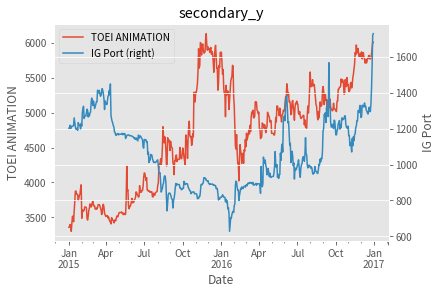

In [55]:
anime_stock_price_csv = os.path.join(base_url, "anime_stock_price.csv")
anime_stock_price_df = pd.read_csv(anime_stock_price_csv, index_col=0, parse_dates=True) # parse_dates가 True면 index를 datetime으로 한다_정식문서
ax = anime_stock_price_df.plot(secondary_y=["IG Port"])
ax.set_title("secondary_y")
ax.set_ylabel("TOEI ANIMATION")
ax.right_ax.set_ylabel("IG Port")
# 요거는 내가 특별히 xticks를 책의 양식과 맞추기 위해 넣은 코드다.
# from matplotlib.dates import (YEARLY, DateFormatter,
#                               rrulewrapper, RRuleLocator, drange)
# formatter = DateFormatter('%m-%d')
# ax.xaxis.set_major_formatter(formatter)
# ax.xaxis.set_tick_params(rotation=30, labelsize=10)

plt.show()

복수의 그림에 분할하는 방법

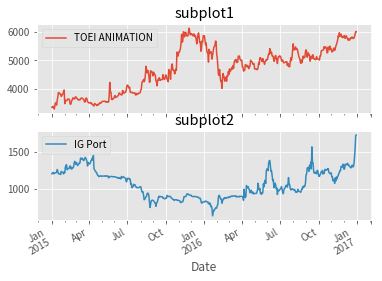

In [56]:
ax1, ax2 = anime_stock_price_df.plot(subplots=True)
ax1.set_title('subplot1')
ax2.set_title('subplot2')
plt.show()

### 산포도 그래프 작성하기
plot.scatter() 메서드를 사용한다. 키워드 인수 x에 X값이 되는 열 이름, 키워드 인수 y에 Y값이 되는 열 이름을 지정한다. 

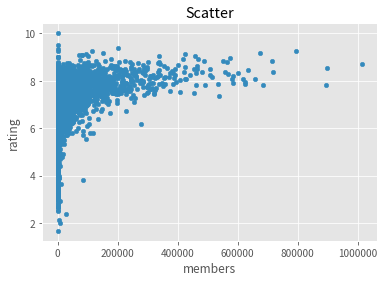

In [57]:
anime_master_csv = os.path.join(base_url, "anime_master.csv")
anime_master_df = pd.read_csv(anime_master_csv)
ax = anime_master_df.plot.scatter(x='members', y='rating')
ax.set_title('Scatter')
plt.show()

### 막대 그래프 작성하기 (with Pivot Table)

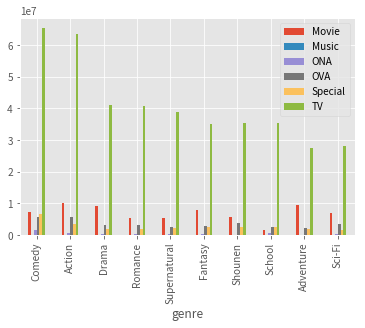

In [58]:
anime_genre_top10_pivoted_csv = os.path.join(base_url, "anime_genre_top10_pivoted.csv")
anime_genre_top10_pivoted_df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col=0)
ax = anime_genre_top10_pivoted_df.plot.bar()
plt.show()

로그축으로 변경하는 경우
- 키워드 인수 logy에 True를 설정하면 Y축이 로그가 된다.
- legend() 메서드의 키워드 인수 bbox_to_anchor를 설정하여 범례의 위치를 조정할 수 있다.


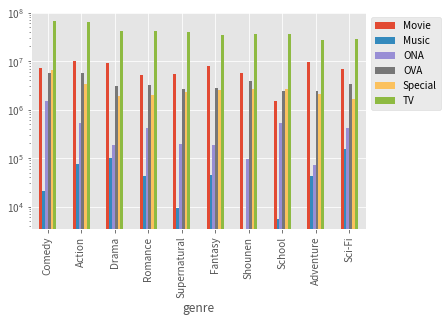

In [59]:
ax = anime_genre_top10_pivoted_df.plot.bar(logy=True)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

누적막대그래프는 stacked 인수에 True를 설정한다.

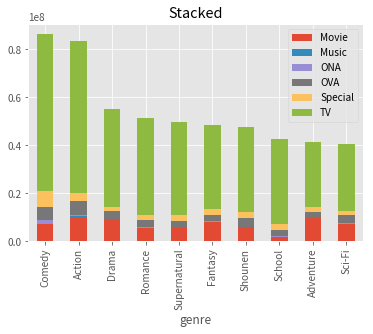

In [61]:
ax = anime_genre_top10_pivoted_df.plot.bar(stacked=True)
ax.set_title('Stacked')
plt.show()

### 히스토그램
- hist() 메서드 사용
- 키워드 인수 bins에 정수값 설정하여 막대수 변경가능

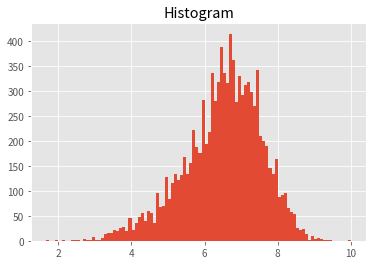

In [62]:
ax = anime_master_df['rating'].hist(bins=100)
ax.set_title('Histogram')
plt.show()

### 상자수염 그래프 작성하기(박스플랏)

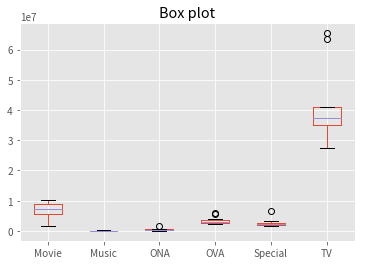

In [63]:
ax = anime_genre_top10_pivoted_df.plot.box()
ax.set_title("Box plot")
plt.show()

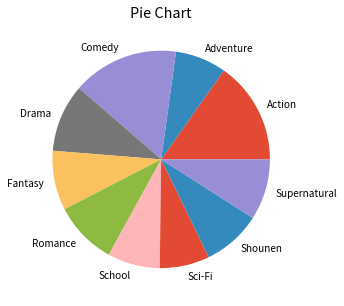

In [66]:
anime_genre_top10_csv = os.path.join(base_url, "anime_genre_top10.csv")
anime_genre_top10_df = pd.read_csv(anime_genre_top10_csv)
ax = anime_genre_top10_df.groupby("genre").sum()["members"].plot.pie(figsize=(5, 5))
ax.set_title("Pie Chart")
ax.set_ylabel("")  # Y축 레이블 삭제
plt.show()